# SMS Spam Classifier 📩🚫

## Problem Statement  
With the increasing use of mobile communication, spam messages have become a common issue. These messages often contain fraudulent offers, phishing attempts, or promotional content. The goal of this project is to build a **machine learning model** that can classify SMS messages as **spam** or **ham (not spam)**.  

## Objectives  
- Preprocess text messages to remove noise  
- Extract meaningful features using **TF-IDF Vectorization**  
- Train a **Naïve Bayes classifier** for spam detection  
- Deploy the model using **Streamlit and Render** for real-time spam classification  


## 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter

## Loading Dataset

In [3]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4489,ham,My computer just fried the only essential part...,NaN,NaN,NaN
525,ham,Hi i won't b ard 4 christmas. But do enjoy n m...,NaN,NaN,NaN
1371,ham,I though we shd go out n have some fun so bar ...,NaN,NaN,NaN
4412,ham,Sad story of a Man - Last week was my b'day. M...,NaN,NaN,NaN
885,ham,Gibbs unsold.mike hussey,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
3764,spam,Someone U know has asked our dating service 2 ...
5483,ham,So li hai... Me bored now da lecturer repeatin...
3384,ham,Ok can...
2476,ham,i dnt wnt to tlk wid u
1024,ham,Hasn't that been the pattern recently crap wee...


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1208,ham,Also maaaan are you missing out
2948,ham,at bruce b downs &amp; fletcher now
4967,ham,Future is not what we planned for tomorrow.......
243,ham,Although i told u dat i'm into baig face watch...
4196,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...


In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2.EDA

In [17]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
ham     4516
spam     653
Name: count, dtype: int64

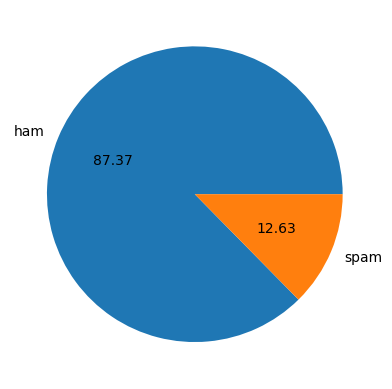

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

## Data is imbalanced

In [21]:
import nltk

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# ham
df[df['target'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
#spam
df[df['target'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

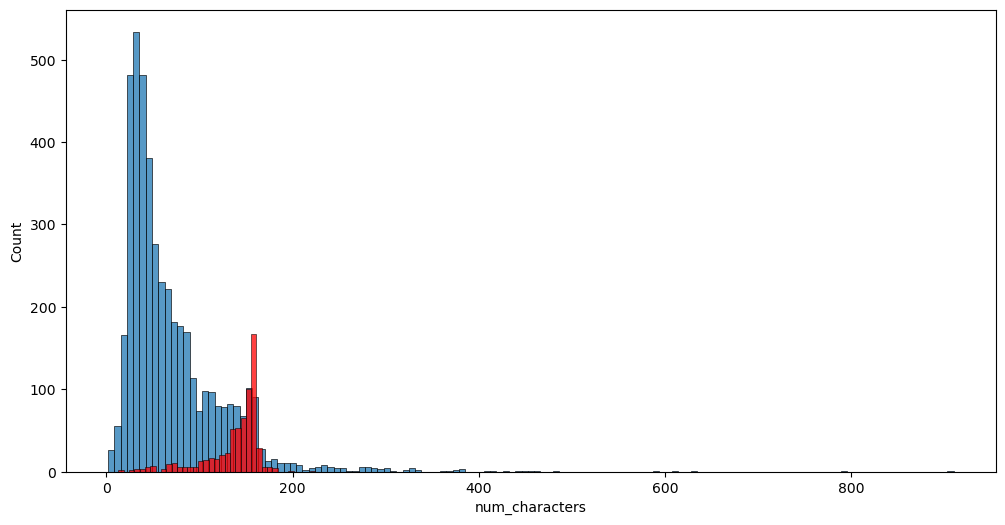

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 'ham']['num_characters'])
sns.histplot(df[df['target'] == 'spam']['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

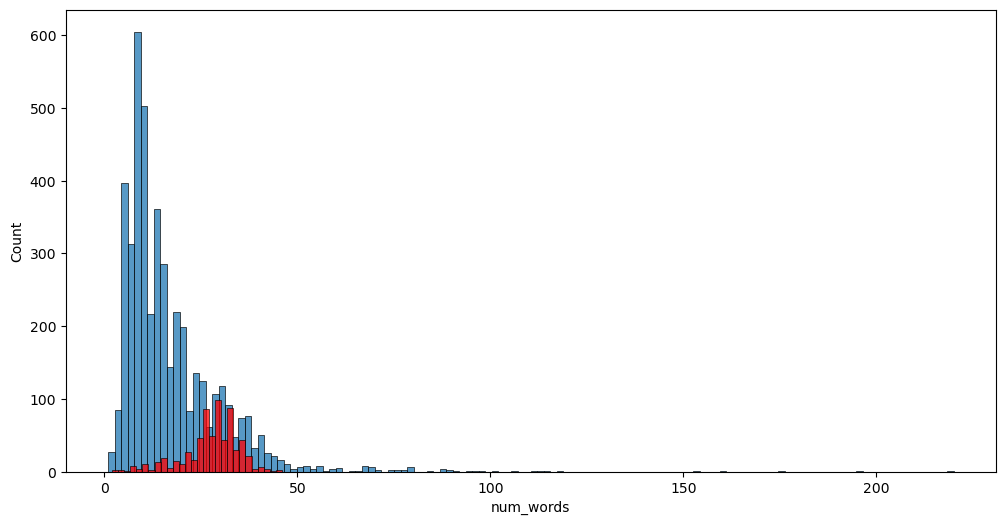

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 'ham']['num_words'])
sns.histplot(df[df['target'] == 'spam']['num_words'],color='red')

### **Overall Dataset Analysis**
- The average SMS message contains **79 characters**, **18 words**, and **2 sentences**.
- The longest message has **910 characters**, **220 words**, and **38 sentences**.
- The shortest message has just **2 characters** and **1 word**.

---

### **Comparison: Ham vs. Spam Messages**
| Feature         | Overall (All Messages) | Ham (Non-Spam) | Spam |
|---------------|----------------------|----------------|------|
| **Avg Characters** | 79  | 70  | **138** |
| **Avg Words** | 18  | 17  | **28** |
| **Avg Sentences** | 2  | 1.8  | **3** |
| **Max Characters** | 910 | 910 | **224** |
| **Max Words** | 220 | 220 | **46** |
| **Max Sentences** | 38 | 38 | **9** |

### **Observations**
1. **Spam messages are significantly longer**  
   - The average spam message has **138 characters**, while a normal (ham) message has **70 characters**.  
   - Spam messages contain nearly **twice the number of words** compared to ham messages.  

2. **Spam messages have more sentences**  
   - Spam messages tend to have around **3 sentences on average**, while ham messages usually have **1-2 sentences**.

3. **Ham messages vary more in length**  
   - Some ham messages are **very long (910 characters, 220 words)**, which means some genuine messages are long.  
   - Spam messages are generally **shorter** but still **longer than the average ham message**.

### **Conclusion**
- **Spam messages are generally longer, contain more words, and have more sentences compared to ham messages.**  
- This difference can be used for **feature engineering** when building the spam classifier, e.g., **message length, word count, and sentence count** can be useful features.


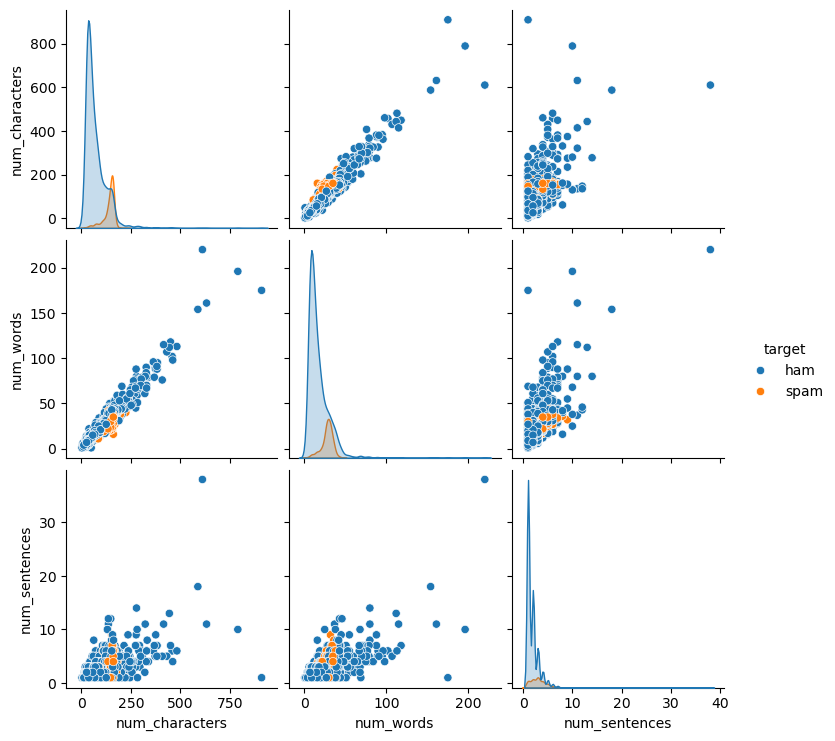

In [34]:
sns.pairplot(df,hue='target')

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Lemmatization

In [35]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Needed for lemmatization

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Load stopwords once (better performance)
stop_words = set(stopwords.words('english'))

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    text = nltk.word_tokenize(text)  # Tokenize text
    
    # Keep only alphanumeric words
    text = [word for word in text if word.isalnum()]
    
    # Remove stopwords & punctuation
    text = [word for word in text if word not in stop_words and word not in string.punctuation]
    
    # Apply lemmatization
    text = [lemmatizer.lemmatize(word) for word in text]
    
    return " ".join(text)

# Test the function
print(transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today."))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


gon na home soon want talk stuff anymore tonight k cried enough today


In [36]:
df['transformed_text'] = df['text'].apply(transform_text)

In [37]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [39]:
spam_wc = wc.generate(df[df['target'] == 'spam']['transformed_text'].str.cat(sep=" "))

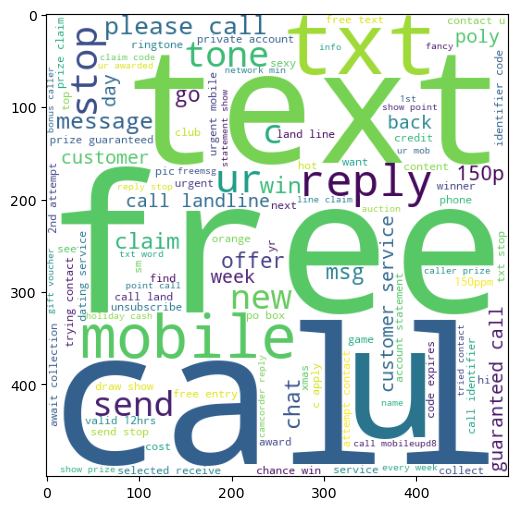

In [40]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

### 📊 **Analysis of the Word Cloud (Spam Messages)**  

The **word cloud** for **spam messages** reveals the most commonly used words in SMS spam. These insights help us understand how spam messages are structured.  

#### 🔹 **Frequent Words in Spam Messages**  
- **"Free", "Call", "Text", "Mobile", "Reply", "Win", "Claim", "Offer", "Prize", "Customer"**  
- These words suggest that **spam messages** are heavily focused on promotions, giveaways, and deceptive offers.  

#### 🔹 **Common Themes in Spam Messages**  
1. **Promotional Offers & Scams**: Words like **"free"**, **"win"**, **"prize"**, **"claim"**, and **"offer"** indicate that spam messages often try to lure users with fake rewards.  
2. **Urgency & Call-to-Action**: Terms such as **"reply"**, **"call"**, and **"send"** suggest that spam messages urge users to take immediate action.  
3. **Mobile Services & Subscriptions**: Words like **"mobile"**, **"customer service"**, **"text"**, and **"tone"** hint at spam related to ringtones, subscription services, or fake support messages.  
4. **Financial & Payment Fraud**: The presence of words like **"credit"**, **"guaranteed"**, and **"claim"** indicates scams that trick users into providing personal or financial details.  

#### 🔹 **Comparison with Ham Messages**  
- Unlike **ham messages**, which contain **casual conversations**, spam messages rely on **aggressive marketing words**.  
- Spam messages contain **more formal and sales-driven language**, while ham messages are **shorter and more personal**.  



In [41]:
ham_wc = wc.generate(df[df['target'] == 'ham']['transformed_text'].str.cat(sep=" "))

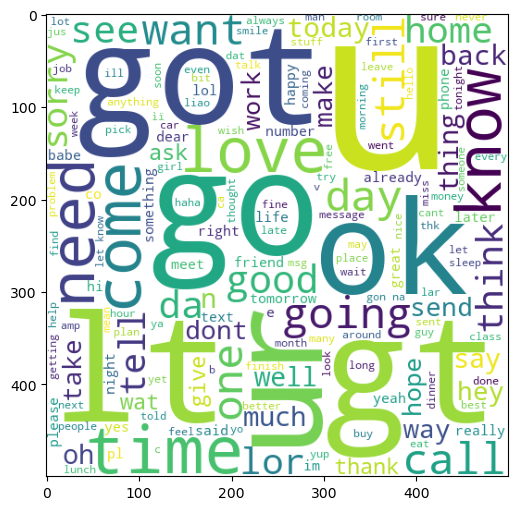

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

### 📊 **Analysis of the Word Cloud (Ham Messages)**  

The **word cloud** for **ham (non-spam) messages** gives us insights into the most frequently used words in regular SMS conversations. Here are some key observations:  

#### 🔹 **Frequent Words in Ham Messages**  
- **"Got", "Good", "Come", "Need", "Time", "Call", "Love", "Know", "Going", "Want"**  
- These words suggest that **ham messages** are mostly about **casual conversations, greetings, and coordination (e.g., making plans, asking about someone's well-being, or expressing emotions).**  

#### 🔹 **Common Themes in Ham Messages**  
1. **Personal Communication**: Words like **"love"**, **"thank"**, and **"good"** indicate friendly and affectionate conversations.  
2. **Planning & Coordination**: Words such as **"time"**, **"come"**, and **"call"** suggest that many messages involve scheduling or checking on someone.  
3. **Seeking Assistance**: Words like **"need"** and **"help"** may indicate requests for help or favors.  
4. **Daily Conversations**: Terms such as **"going"**, **"think"**, and **"home"** are commonly used in everyday discussions.  


In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


In [44]:
spam_corpus = []
for msg in df[df['target'] == 'spam']['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [45]:
len(spam_corpus)

9939

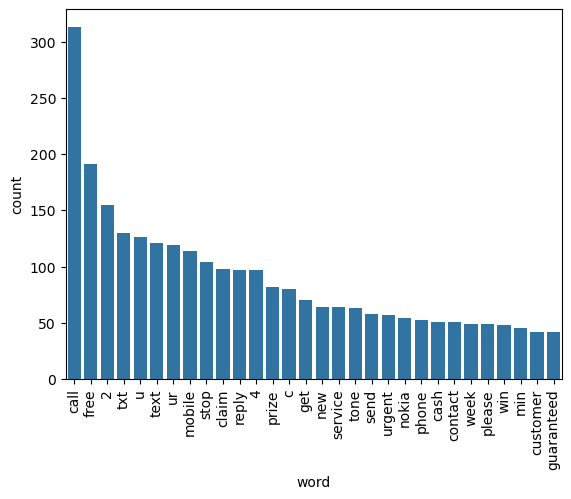

In [46]:
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=["word", "count"])
sns.barplot(x=word_freq["word"], y=word_freq["count"])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
ham_corpus = []
for msg in df[df['target'] == 'ham']['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [48]:
len(ham_corpus)

35404

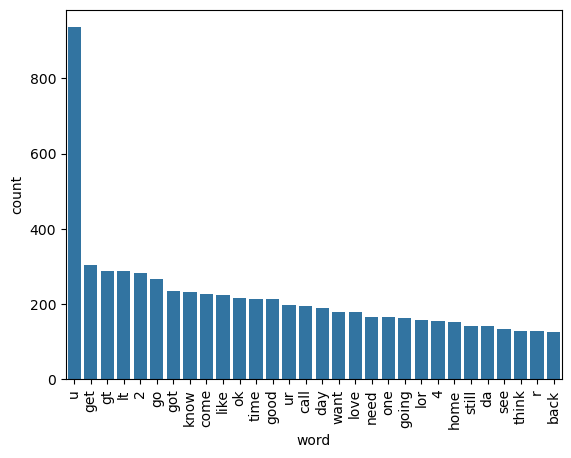

In [49]:
word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["word", "count"])
sns.barplot(x=word_freq["word"], y=word_freq["count"])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though


## 4. Model Building

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# Split Data (Ensuring no leakage)
X_train, X_test, y_train, y_test = train_test_split(df['transformed_text'], df['target'], test_size=0.2, random_state=2, stratify=df['target'])

# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [53]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [54]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.8646034816247582
[[777 126]
 [ 14 117]]
0.48148148148148145
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       903
           1       0.48      0.89      0.63       131

    accuracy                           0.86      1034
   macro avg       0.73      0.88      0.77      1034
weighted avg       0.92      0.86      0.88      1034



In [55]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.97678916827853
[[903   0]
 [ 24 107]]
1.0
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       903
           1       1.00      0.82      0.90       131

    accuracy                           0.98      1034
   macro avg       0.99      0.91      0.94      1034
weighted avg       0.98      0.98      0.98      1034



In [56]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

0.9874274661508704
[[903   0]
 [ 13 118]]
1.0
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       903
           1       1.00      0.90      0.95       131

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [60]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [61]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    report= classification_report(y_test,y_pred)
    
    return accuracy,precision,report

In [62]:
accuracy_scores = []
precision_scores = []
report =[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision,report = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print('report - ',report )

For  SVC
Accuracy -  0.9835589941972921
Precision -  0.9523809523809523
report -                precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.95      0.92      0.93       131

    accuracy                           0.98      1034
   macro avg       0.97      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034

For  KN
Accuracy -  0.9177949709864603
Precision -  1.0
report -                precision    recall  f1-score   support

           0       0.91      1.00      0.96       903
           1       1.00      0.35      0.52       131

    accuracy                           0.92      1034
   macro avg       0.96      0.68      0.74      1034
weighted avg       0.92      0.92      0.90      1034

For  NB
Accuracy -  0.97678916827853
Precision -  1.0
report -                precision    recall  f1-score   support

           0       0.97      1.00      0.99       903
           1       1.00  

c:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.8983050847457628
report -                precision    recall  f1-score   support

           0       0.97      0.99      0.98       903
           1       0.90      0.81      0.85       131

    accuracy                           0.96      1034
   macro avg       0.94      0.90      0.92      1034
weighted avg       0.96      0.96      0.96      1034

For  BgC
Accuracy -  0.9642166344294004
Precision -  0.8790322580645161
report -                precision    recall  f1-score   support

           0       0.98      0.98      0.98       903
           1       0.88      0.83      0.85       131

    accuracy                           0.96      1034
   macro avg       0.93      0.91      0.92      1034
weighted avg       0.96      0.96      0.96      1034

For  ETC
Accuracy -  0.9835589941972921
Precision -  0.9672131147540983
report -                precision    recall  f1-score   support

           0       0.99      1.00      0

In [63]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [64]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [65]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [66]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9893617021276596
Precision 0.9918032786885246


In [67]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [68]:
from sklearn.ensemble import StackingClassifier

In [69]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [70]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9903288201160542
Precision 0.991869918699187


| Model          | Accuracy | Precision (Spam) | Precision (Not Spam) | Recall (Spam) | Recall (Not Spam) | F1-score (Spam) | F1-score (Not Spam) |
|---------------|----------|------------------|----------------------|--------------|------------------|--------------|------------------|
| Gaussian NB   | 0.8646   | 0.4815           | 0.98                 | 0.89         | 0.86             | 0.63         | 0.92             |
| Multinomial NB | 0.9768  | 1.0              | 0.97                 | 0.82         | 1.00             | 0.90         | 0.99             |
| Bernoulli NB  | 0.9874   | 1.0              | 0.99                 | 0.90         | 1.00             | 0.95         | 0.99             |
| SVC           | 0.9836   | 0.9524           | 0.99                 | 0.92         | 0.99             | 0.93         | 0.99             |
| K-Neighbors   | 0.9178   | 1.0              | 0.91                 | 0.35         | 1.00             | 0.52         | 0.96             |
| Decision Tree | 0.9371   | 0.8438           | 0.95                 | 0.62         | 0.98             | 0.71         | 0.96             |
| Logistic Reg. | 0.9613   | 0.9252           | 0.97                 | 0.76         | 0.99             | 0.83         | 0.98             |
| Random Forest | 0.9845   | 1.0              | 0.98                 | 0.88         | 1.00             | 0.93         | 0.99             |
| AdaBoost      | 0.9642   | 0.8983           | 0.97                 | 0.81         | 0.99             | 0.85         | 0.98             |
| Bagging Classifier | 0.9642 | 0.8790        | 0.98                 | 0.83         | 0.98             | 0.85         | 0.98             |
| Extra Trees   | 0.9836   | 0.9672           | 0.99                 | 0.90         | 1.00             | 0.93         | 0.99             |
| GBDT          | 0.9507   | 0.8922           | 0.96                 | 0.69         | 0.99             | 0.78         | 0.97             |
| XGBoost       | 0.9691   | 0.9304           | 0.97                 | 0.82         | 0.99             | 0.87         | 0.98             |


### Model Selection: Best Choice for Spam Classification

The best model selection depends on the **business objective** and **trade-offs** between precision, recall, and F1-score. Based on documented results, I would choose **Bernoulli Naïve Bayes (Bernoulli NB)** because:  

📌 **Reasons for Choosing Bernoulli NB:**
1. **Highest Accuracy (0.9874):** It performs very well overall.  
2. **Perfect Precision for Spam (1.0):** It never misclassifies non-spam as spam.  
3. **High Recall for Spam (0.90):** It correctly identifies 90% of actual spam emails.  
4. **High F1-score for Spam (0.95):** A good balance between precision and recall.  
5. **Low Complexity:** It's a simple, efficient model that works well for text classification problems.  

---

✅ **When to Choose a Different Model?**
- If **false positives (misclassifying non-spam as spam) are critical**, **Multinomial NB** or **SVC** could be alternatives since they also have high precision and recall.  
- If you need a more **generalized model for unseen data**, **Random Forest (0.9845)** is a strong alternative with high recall and precision.  

💡 **Final Decision:** **Bernoulli NB** is the best choice for a spam classifier because it achieves high accuracy, strong precision, and a good recall balance while being computationally efficient. 🚀
